In [13]:
from experiment import Experiment, model_functions
from experiment.datasets import load_cifar10
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from experiment.models import Configuration
from sqlalchemy.sql import func
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from experiment.experiment_mp_notebook import get_uncertainty_scores, margin_of_confidence_score

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = load_cifar10(validation_size=1000)
X_train, y_train = data[0][0], data[0][1]
X_val, y_val = data[1][0], data[1][1]
X_test, y_test = data[2][0], data[2][1]

In [3]:
model = model_functions.model_1()

early_stop_callback = EarlyStopping(patience=5)
model.fit(X_train, y_train, validation_data=(X_val, y_val),
    epochs=50, batch_size=64, verbose=1)

Epoch 1/50
766/766 [==============================] - 159s 206ms/step - loss: 2.8444 - accuracy: 0.3347 - val_loss: 1.5137 - val_accuracy: 0.4580
Epoch 2/50
766/766 [==============================] - 120s 157ms/step - loss: 1.3693 - accuracy: 0.5132 - val_loss: 1.3223 - val_accuracy: 0.5270
Epoch 3/50
766/766 [==============================] - 126s 165ms/step - loss: 1.1060 - accuracy: 0.6101 - val_loss: 1.2209 - val_accuracy: 0.5680
Epoch 4/50
766/766 [==============================] - 147s 192ms/step - loss: 0.8900 - accuracy: 0.6869 - val_loss: 1.2526 - val_accuracy: 0.5880
Epoch 5/50
766/766 [==============================] - 114s 148ms/step - loss: 0.6966 - accuracy: 0.7560 - val_loss: 1.3305 - val_accuracy: 0.5860
Epoch 6/50
766/766 [==============================] - 114s 149ms/step - loss: 0.5367 - accuracy: 0.8121 - val_loss: 1.4183 - val_accuracy: 0.5720
Epoch 7/50
766/766 [==============================] - 106s 139ms/step - loss: 0.4236 - accuracy: 0.8525 - val_loss: 1.6659 -

In [6]:
preds = model.predict(X_train)

In [7]:
unc_scores = get_uncertainty_scores(preds, margin_of_confidence_score)

In [11]:
unc_scores.sort_values(ascending=False)[:25]

21243    0.996390
20136    0.995558
35246    0.994703
31944    0.994439
10708    0.994162
3318     0.993828
9775     0.992462
15676    0.991240
26505    0.988139
13283    0.988066
46699    0.983329
21232    0.982737
27734    0.982302
1358     0.981346
38665    0.979784
34128    0.977996
28136    0.977142
45495    0.975549
11447    0.975042
44974    0.974436
11592    0.973987
13706    0.970345
29399    0.968259
40915    0.965845
29299    0.965708
dtype: float64

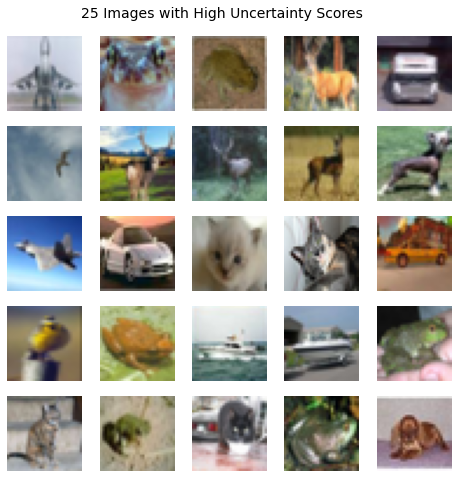

In [15]:
# Display some tiny images
# This is a replication of the chart at https://www.cs.toronto.edu/~kriz/cifar.html
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
unc_ix = unc_scores.sort_values(ascending=False)[:25].index
axs = axs.ravel()
for ix, ax in zip(unc_ix, axs):
    img = X_train[ix]
    ax.imshow(img)
    ax.set_axis_off()
fig.suptitle('25 Images with High Uncertainty Scores',
            fontsize=14, y=0.93);
